##  Install the EVA4 packages, hosted @ github

In [6]:
!pip install git+https://git@github.com/ojhajayant/eva.git

  Cloning https://****@github.com/ojhajayant/eva.git to c:\users\ojhaj\appdata\local\temp\pip-req-build-sh1b3oju
  Created wheel for eva: filename=eva-0.0.2-py3-none-any.whl size=23077 sha256=cec49727abe67fe0c05782784c06bc8ee15540568ed5e886aaeea153981cb088
  Stored in directory: C:\Users\ojhaj\AppData\Local\Temp\pip-ephem-wheel-cache-dqn6wksy\wheels\10\eb\41\b45f3a92716bbd015028946c2b4873f4622041a4db30191fb6
Successfully built eva
  Attempting uninstall: eva
    Found existing installation: eva 0.0.1
    Uninstalling eva-0.0.1:
      Successfully uninstalled eva-0.0.1


  Running command git clone -q 'https://****@github.com/ojhajayant/eva.git' 'C:\Users\ojhaj\AppData\Local\Temp\pip-req-build-sh1b3oju'


# Import Libraries

In [1]:
from __future__ import print_function

import os
import sys
import warnings

import numpy as np
import torch
import torch.optim as optim
from torchsummary import summary

#For the week7 assignment, I had submitted in python-script mode, 
#rather than the required ipynb-notebook format after the package
#installation (hosted @ github), hence I had to make some modifications
#in the week7 submission it self to make it installable (had to add
#setup.py, few empty __init__.py files & some changes in the way local
#imports were made)
#Later on, to accomodate the week8-assignment's requirement to have
#the ResNet18 NW incorporated, from the given github repo:
#https://github.com/kuangliu/pytorch-cifar, I have shifted this 
#additional stuff under the "week8"-package.
#Hence, below I am making these imports from "week8.modular",
#This particular file, emulates the "main.py", which was the main
#script to be run in my last submission.Hence this ipynb file
#now represents almost the same main-script.
from week8.modular import cfg
from week8.modular import network
from week8.modular import preprocess
from week8.modular import test
from week8.modular import train
from week8.modular import utils

sys.path.append('./')
args = cfg.parser.parse_args(args=[])
if args.cmd == None:
    args.cmd = 'test'
IPYNB_ENV = True

### Save the config file, with all default/provided/required configuration

In [2]:
print("The config used for this run are being saved @ {}".format(os.path.join(args.prefix, 'config_params.txt')))
utils.write(vars(args), os.path.join(args.prefix, 'config_params.txt'))

The config used for this run are being saved @ data\config_params.txt


### Calculate mean & std for Normalization

In [3]:
mean, std = preprocess.get_dataset_mean_std()

Files already downloaded and verified
(1600000, 32, 3)
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]


###  Dataloader Arguments & Test/Train Dataloaders

In [4]:
train_cifar10, test_cifar10, train_loader, test_loader = preprocess.preprocess_data((mean[0], mean[1], mean[2]), (std[0], std[1], std[2]))

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


### Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

[Stats from Train Data]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)
[Stats from Test Data]
 - Numpy Shape: (10000, 32, 32, 3)
 - Tensor Shape: torch.Size([10000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 32, 32])
torch.Size([64])
Saving plot for a sample to ascertain RF required for edges & gradient D:\PG-ML\eva4\week8\./data/data_stats.png


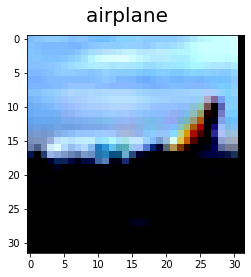

In [5]:
preprocess.get_data_stats(train_cifar10, test_cifar10, train_loader)

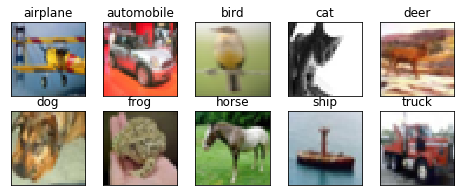

In [6]:
utils.plot_train_samples(train_loader)

### Using L1-regularization here 
(l1_weight = 0.000025, started out reusing some older assignment values, but works OK here too)

In [7]:
L1 = args.L1   
print("L1:", L1)
L2 = args.L2   
print("L2:", L2)

L1: True
L2: False


### detect the device being run on

In [8]:
device = torch.device("cuda" if args.cuda else "cpu")
print(device)

cuda


### Get the model loaded with summary

In [9]:
model = network.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

C:\Users\ojhaj\Anaconda3\lib\site-packages\week8\modular\network.py:75: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


## Training and Testing

  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

Model training starts on CIFAR10 dataset
EPOCH: 1


Loss=1.2107690572738647 Batch_id=781 Accuracy=41.43: 100%|███████████████████████████| 782/782 [01:56<00:00,  6.72it/s]



Test set: Average loss: 1.2744, Accuracy: 5338/10000 (53.38%)

validation-accuracy improved from 0 to 53.38, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-1_L1-1_L2-0_val_acc-53.38.h5
EPOCH: 2


Loss=1.4697918891906738 Batch_id=781 Accuracy=59.03: 100%|███████████████████████████| 782/782 [01:57<00:00,  6.64it/s]



Test set: Average loss: 1.0451, Accuracy: 6288/10000 (62.88%)

validation-accuracy improved from 53.38 to 62.88, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-2_L1-1_L2-0_val_acc-62.88.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 3


Loss=0.9282803535461426 Batch_id=781 Accuracy=66.83: 100%|███████████████████████████| 782/782 [01:58<00:00,  6.62it/s]



Test set: Average loss: 0.9193, Accuracy: 6775/10000 (67.75%)

validation-accuracy improved from 62.88 to 67.75, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-3_L1-1_L2-0_val_acc-67.75.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 4


Loss=0.8228573203086853 Batch_id=781 Accuracy=72.04: 100%|███████████████████████████| 782/782 [01:58<00:00,  6.60it/s]



Test set: Average loss: 0.8337, Accuracy: 7177/10000 (71.77%)

validation-accuracy improved from 67.75 to 71.77, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-4_L1-1_L2-0_val_acc-71.77.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 5


Loss=1.0518923997879028 Batch_id=781 Accuracy=75.75: 100%|███████████████████████████| 782/782 [01:59<00:00,  6.56it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8460, Accuracy: 7162/10000 (71.62%)

EPOCH: 6


Loss=0.7382607460021973 Batch_id=781 Accuracy=78.18: 100%|███████████████████████████| 782/782 [02:00<00:00,  6.52it/s]



Test set: Average loss: 0.6492, Accuracy: 7762/10000 (77.62%)

validation-accuracy improved from 71.77 to 77.62, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-6_L1-1_L2-0_val_acc-77.62.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 7


Loss=0.4634123742580414 Batch_id=781 Accuracy=80.03: 100%|███████████████████████████| 782/782 [01:59<00:00,  6.53it/s]



Test set: Average loss: 0.5757, Accuracy: 8057/10000 (80.57%)

validation-accuracy improved from 77.62 to 80.57, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-7_L1-1_L2-0_val_acc-80.57.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 8


Loss=0.877304196357727 Batch_id=781 Accuracy=81.69: 100%|████████████████████████████| 782/782 [01:59<00:00,  6.54it/s]



Test set: Average loss: 0.5643, Accuracy: 8111/10000 (81.11%)

validation-accuracy improved from 80.57 to 81.11, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-8_L1-1_L2-0_val_acc-81.11.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 9


Loss=0.7454615831375122 Batch_id=781 Accuracy=83.04: 100%|███████████████████████████| 782/782 [01:59<00:00,  6.53it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5655, Accuracy: 8097/10000 (80.97%)

EPOCH: 10


Loss=0.32246485352516174 Batch_id=781 Accuracy=84.10: 100%|██████████████████████████| 782/782 [02:00<00:00,  6.48it/s]



Test set: Average loss: 0.5338, Accuracy: 8247/10000 (82.47%)

validation-accuracy improved from 81.11 to 82.47, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-10_L1-1_L2-0_val_acc-82.47.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 11


Loss=0.34272873401641846 Batch_id=781 Accuracy=85.17: 100%|██████████████████████████| 782/782 [02:01<00:00,  6.45it/s]



Test set: Average loss: 0.4735, Accuracy: 8435/10000 (84.35%)

validation-accuracy improved from 82.47 to 84.35, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-11_L1-1_L2-0_val_acc-84.35.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 12


Loss=0.6178702116012573 Batch_id=781 Accuracy=86.08: 100%|███████████████████████████| 782/782 [02:00<00:00,  6.49it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4826, Accuracy: 8389/10000 (83.89%)

EPOCH: 13


Loss=0.40690183639526367 Batch_id=781 Accuracy=86.97: 100%|██████████████████████████| 782/782 [02:00<00:00,  6.47it/s]



Test set: Average loss: 0.4471, Accuracy: 8496/10000 (84.96%)

validation-accuracy improved from 84.35 to 84.96, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-13_L1-1_L2-0_val_acc-84.96.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 14


Loss=0.3110704720020294 Batch_id=781 Accuracy=87.59: 100%|███████████████████████████| 782/782 [02:00<00:00,  6.48it/s]



Test set: Average loss: 0.4623, Accuracy: 8501/10000 (85.01%)

validation-accuracy improved from 84.96 to 85.01, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-14_L1-1_L2-0_val_acc-85.01.h5
EPOCH: 15


Loss=0.2781562805175781 Batch_id=781 Accuracy=88.09: 100%|███████████████████████████| 782/782 [02:00<00:00,  6.48it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4730, Accuracy: 8459/10000 (84.59%)

EPOCH: 16


Loss=0.21431131660938263 Batch_id=781 Accuracy=88.86: 100%|██████████████████████████| 782/782 [02:01<00:00,  6.44it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4704, Accuracy: 8457/10000 (84.57%)

EPOCH: 17


Loss=0.3530069589614868 Batch_id=781 Accuracy=89.25: 100%|███████████████████████████| 782/782 [02:01<00:00,  6.46it/s]



Test set: Average loss: 0.4224, Accuracy: 8635/10000 (86.35%)

validation-accuracy improved from 85.01 to 86.35, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-17_L1-1_L2-0_val_acc-86.35.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 18


Loss=0.2505944073200226 Batch_id=781 Accuracy=90.02: 100%|███████████████████████████| 782/782 [02:00<00:00,  6.48it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4629, Accuracy: 8561/10000 (85.61%)

EPOCH: 19


Loss=0.27494993805885315 Batch_id=781 Accuracy=90.41: 100%|██████████████████████████| 782/782 [02:00<00:00,  6.48it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4472, Accuracy: 8568/10000 (85.68%)

EPOCH: 20


Loss=0.18553119897842407 Batch_id=781 Accuracy=90.89: 100%|██████████████████████████| 782/782 [02:00<00:00,  6.47it/s]



Test set: Average loss: 0.4097, Accuracy: 8705/10000 (87.05%)

validation-accuracy improved from 86.35 to 87.05, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-20_L1-1_L2-0_val_acc-87.05.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 21


Loss=0.8716439008712769 Batch_id=781 Accuracy=91.14: 100%|███████████████████████████| 782/782 [02:00<00:00,  6.49it/s]



Test set: Average loss: 0.3959, Accuracy: 8745/10000 (87.45%)

validation-accuracy improved from 87.05 to 87.45, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-21_L1-1_L2-0_val_acc-87.45.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 22


Loss=0.5520456433296204 Batch_id=781 Accuracy=91.54: 100%|███████████████████████████| 782/782 [02:00<00:00,  6.47it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4014, Accuracy: 8719/10000 (87.19%)

EPOCH: 23


Loss=0.5016188621520996 Batch_id=781 Accuracy=92.11: 100%|███████████████████████████| 782/782 [02:00<00:00,  6.47it/s]



Test set: Average loss: 0.3924, Accuracy: 8754/10000 (87.54%)

validation-accuracy improved from 87.45 to 87.54, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-23_L1-1_L2-0_val_acc-87.54.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 24


Loss=0.42992937564849854 Batch_id=781 Accuracy=92.42: 100%|██████████████████████████| 782/782 [02:01<00:00,  6.44it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4069, Accuracy: 8715/10000 (87.15%)

EPOCH: 25


Loss=0.18324445188045502 Batch_id=781 Accuracy=92.65: 100%|██████████████████████████| 782/782 [02:00<00:00,  6.47it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3910, Accuracy: 8746/10000 (87.46%)

EPOCH: 26


Loss=0.09726032614707947 Batch_id=781 Accuracy=93.04: 100%|██████████████████████████| 782/782 [02:01<00:00,  6.42it/s]



Test set: Average loss: 0.3848, Accuracy: 8819/10000 (88.19%)

validation-accuracy improved from 87.54 to 88.19, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-26_L1-1_L2-0_val_acc-88.19.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 27


Loss=0.6072551608085632 Batch_id=781 Accuracy=93.20: 100%|███████████████████████████| 782/782 [02:02<00:00,  6.40it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4156, Accuracy: 8763/10000 (87.63%)

EPOCH: 28


Loss=0.08645926415920258 Batch_id=781 Accuracy=93.58: 100%|██████████████████████████| 782/782 [02:02<00:00,  6.40it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3892, Accuracy: 8817/10000 (88.17%)

EPOCH: 29


Loss=0.5381070971488953 Batch_id=781 Accuracy=94.04: 100%|███████████████████████████| 782/782 [02:02<00:00,  6.37it/s]



Test set: Average loss: 0.3838, Accuracy: 8838/10000 (88.38%)

validation-accuracy improved from 88.19 to 88.38, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-29_L1-1_L2-0_val_acc-88.38.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 30


Loss=0.4520813524723053 Batch_id=781 Accuracy=94.12: 100%|███████████████████████████| 782/782 [02:04<00:00,  6.27it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4254, Accuracy: 8728/10000 (87.28%)

EPOCH: 31


Loss=0.09137478470802307 Batch_id=781 Accuracy=94.44: 100%|██████████████████████████| 782/782 [02:04<00:00,  6.29it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4382, Accuracy: 8699/10000 (86.99%)

EPOCH: 32


Loss=0.14652249217033386 Batch_id=781 Accuracy=94.67: 100%|██████████████████████████| 782/782 [02:02<00:00,  6.39it/s]



Test set: Average loss: 0.3850, Accuracy: 8864/10000 (88.64%)

validation-accuracy improved from 88.38 to 88.64, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-32_L1-1_L2-0_val_acc-88.64.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 33


Loss=0.052406638860702515 Batch_id=781 Accuracy=94.93: 100%|█████████████████████████| 782/782 [02:02<00:00,  6.39it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4366, Accuracy: 8756/10000 (87.56%)

EPOCH: 34


Loss=0.06312966346740723 Batch_id=781 Accuracy=95.45: 100%|██████████████████████████| 782/782 [02:02<00:00,  6.41it/s]



Test set: Average loss: 0.3845, Accuracy: 8886/10000 (88.86%)

validation-accuracy improved from 88.64 to 88.86, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-34_L1-1_L2-0_val_acc-88.86.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 35


Loss=0.019796371459960938 Batch_id=781 Accuracy=95.24: 100%|█████████████████████████| 782/782 [02:02<00:00,  6.40it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3957, Accuracy: 8873/10000 (88.73%)

EPOCH: 36


Loss=0.021409928798675537 Batch_id=781 Accuracy=95.50: 100%|█████████████████████████| 782/782 [02:01<00:00,  6.42it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4048, Accuracy: 8830/10000 (88.30%)

EPOCH: 37


Loss=0.18261584639549255 Batch_id=781 Accuracy=95.78: 100%|██████████████████████████| 782/782 [02:02<00:00,  6.40it/s]



Test set: Average loss: 0.3791, Accuracy: 8941/10000 (89.41%)

validation-accuracy improved from 88.86 to 89.41, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-37_L1-1_L2-0_val_acc-89.41.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 38


Loss=0.07097992300987244 Batch_id=781 Accuracy=95.86: 100%|██████████████████████████| 782/782 [02:01<00:00,  6.42it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4104, Accuracy: 8871/10000 (88.71%)

EPOCH: 39


Loss=0.2160685807466507 Batch_id=781 Accuracy=96.12: 100%|███████████████████████████| 782/782 [02:01<00:00,  6.45it/s]



Test set: Average loss: 0.3783, Accuracy: 8961/10000 (89.61%)

validation-accuracy improved from 89.41 to 89.61, saving model to D:\PG-ML\eva4\week8\./saved_models/CIFAR10_model_epoch-39_L1-1_L2-0_val_acc-89.61.h5


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

EPOCH: 40


Loss=0.05721578001976013 Batch_id=781 Accuracy=96.23: 100%|██████████████████████████| 782/782 [02:01<00:00,  6.46it/s]



Test set: Average loss: 0.3810, Accuracy: 8946/10000 (89.46%)



C:\Users\ojhaj\Anaconda3\lib\site-packages\week8\modular\utils.py:193: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


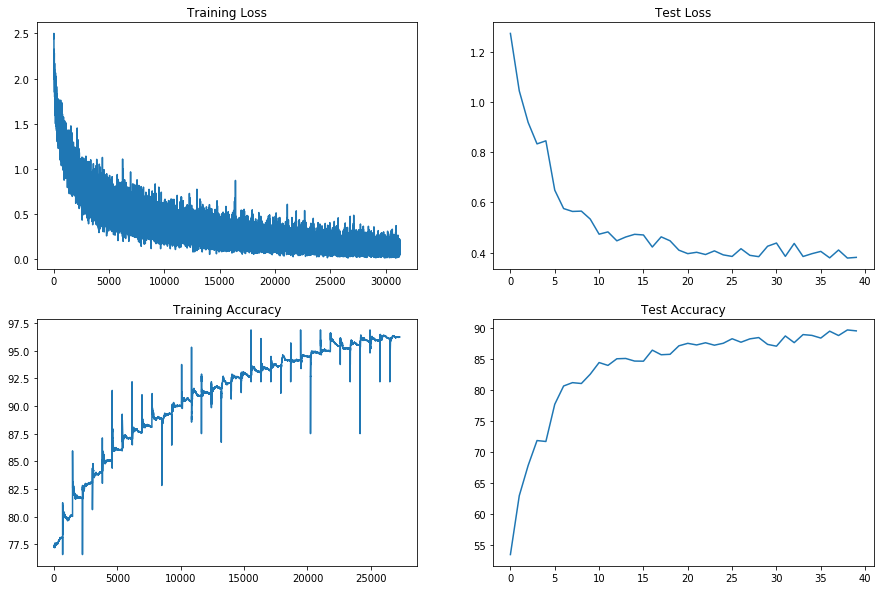

In [10]:
args.cmd = 'train'
print("Model training starts on CIFAR10 dataset")
# Enable L2-regularization with supplied value of weight decay, or keep it default-0
if L2:
    weight_decay = args.l2_weight_decay
else:
    weight_decay = 0
#Found out the better learning rate around 0.0006, have set that as default under cfg.py file
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=0.9, weight_decay=weight_decay)


EPOCHS = args.epochs
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train.train(model, device, train_loader, optimizer, epoch)
    test.test(model, device, test_loader, optimizer, epoch)
utils.plot_acc_loss()

### model-prediction & mislabelled images

Model inference starts on CIFAR10 dataset
Loaded the best model: CIFAR10_model_epoch-39_L1-1_L2-0_val_acc-89.61.h5 from last training session
The confusion-matrix and classification-report for this model are:


C:\Users\ojhaj\Anaconda3\lib\site-packages\week8\modular\network.py:75: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


[[863   5  39  15  17   6   7   7  26  15]
 [  6 953   2   1   1   1   3   2   8  23]
 [ 13   0 889  15  25  20  20  13   3   2]
 [  5   3  37 713  42 124  40  24   7   5]
 [  3   0  31  10 913  16  13  14   0   0]
 [  1   1  12  52  24 880   6  23   0   1]
 [  3   2  34  14   4  10 926   2   4   1]
 [  4   0  10   5  18  18   2 937   1   5]
 [ 18   3   5   4   1   2   1   0 953  13]
 [ 10  32   3   6   0   1   1   2  11 934]]
              precision    recall  f1-score   support

    airplane       0.93      0.86      0.90      1000
  automobile       0.95      0.95      0.95      1000
        bird       0.84      0.89      0.86      1000
         cat       0.85      0.71      0.78      1000
        deer       0.87      0.91      0.89      1000
         dog       0.82      0.88      0.85      1000
        frog       0.91      0.93      0.92      1000
       horse       0.92      0.94      0.93      1000
        ship       0.94      0.95      0.95      1000
       truck       0.93     

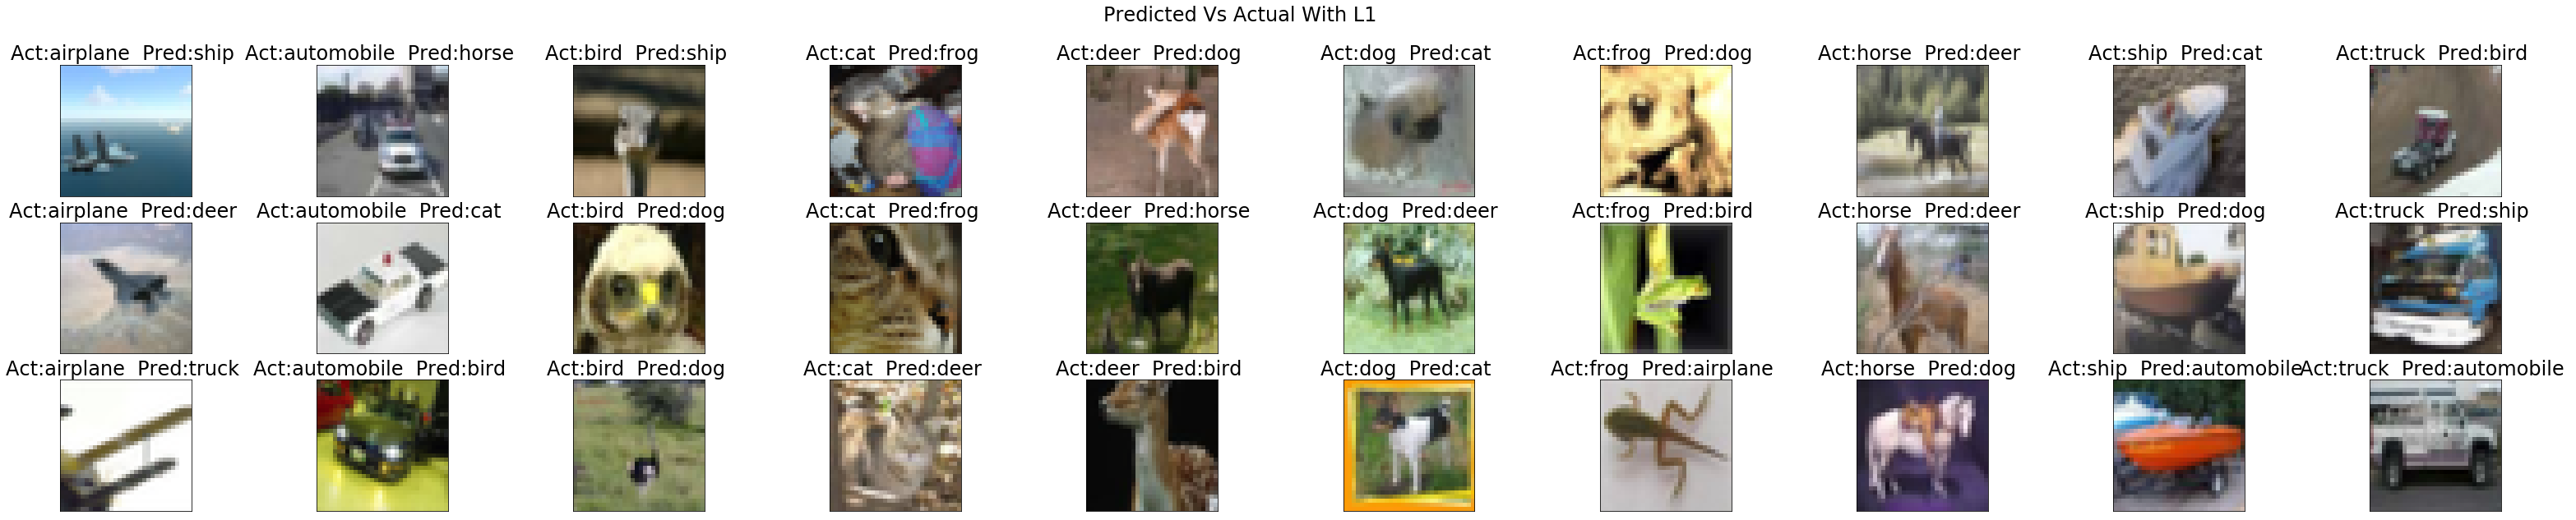

In [12]:
args.cmd = 'test'
print("Model inference starts on CIFAR10 dataset")
#model_name = args.best_model
model_name = 'CIFAR10_model_epoch-39_L1-1_L2-0_val_acc-89.61.h5'
print("Loaded the best model: {} from last training session".format(model_name))
model = utils.load_model(network.ResNet18(), device, model_name=model_name)
y_test = np.array(test_cifar10.targets)
print("The confusion-matrix and classification-report for this model are:")
y_pred = utils.model_pred(model, device, y_test, test_cifar10)
x_test = test_cifar10.data
utils.display_mislabelled(model, device, x_test, y_test.reshape(-1, 1), y_pred, test_cifar10,
                    title_str='Predicted Vs Actual With L1')